Code to Show Gaussian Components as Ellipses

In [205]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

from sklearn.mixture import GaussianMixture

from sklearn.datasets import make_blobs

from matplotlib.patches import Ellipse

In [206]:
# Generate synthetic data

X,y_true = make_blobs(n_samples=500, centers=3, cluster_std=[1.2,2.0,1.5], random_state=42 )

In [207]:
# Fit Gaussian Mixture Model

gmm = GaussianMixture(n_components=3, covariance_type='full',random_state=42)

gmm.fit(X)

gmm_labels = gmm.predict(X)

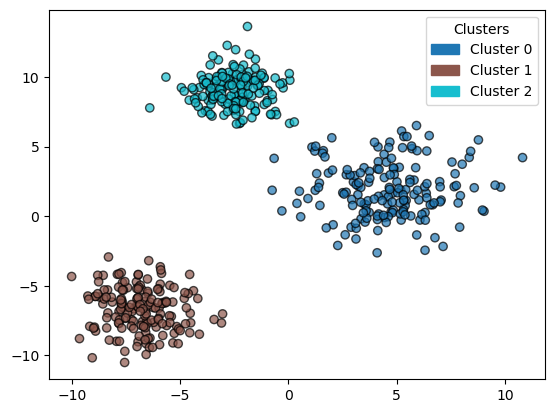

In [208]:

# Get unique cluster labels

unique_gmm_labels = np.unique(gmm_labels)

gmm_cmap = plt.get_cmap('tab10')

# Plot clusters

plt.scatter(X[:,0],X[:,1],c=gmm_labels, cmap=gmm_cmap,edgecolors='k', alpha=0.7)

# Create legend handles for GMM Clustering

gmm_legend_handles = [mpatches.Patch(color=gmm_cmap(i / max(unique_gmm_labels)), label=f'Cluster {i}') for i in unique_gmm_labels]

plt.legend(handles=gmm_legend_handles, title="Clusters")

In [209]:
# Get means and covariances

means = gmm.means_

covariances = gmm.covariances_

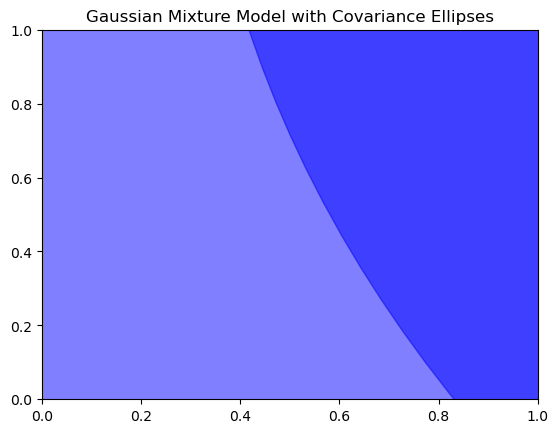

In [212]:
# Function to plot Gaussian components as ellipses

def draw_ellipse(position,covariance, ax=None, **kwargs):

    ax = ax or plt.gca()

    U, s, Vt = np.linalg.svd(covariance)

    angle = np.degrees(np.arctan2(U[1,0],U[0,0]))

    width , height = 2*  np.sqrt(s)

    for factor in [1, 2, 3]:  # 1, 2, 3 standard deviations

        if 'alpha' not in kwargs:  # Set alpha only if not provided
            kwargs['alpha'] = 0.3

        ellipse = (Ellipse(xy = position,
                            width = factor * width , 
                            height = factor * height,
                            angle=angle, 
                            **kwargs))
        
        ax.add_patch(ellipse)

        
# Plot ellipses

for mean, cov in zip(means,covariances):

    draw_ellipse(mean, cov , alpha=0.5, color='blue')


plt.title("Gaussian Mixture Model with Covariance Ellipses")

plt.show()